# Support Vector Machine

In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import itertools
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

# Procesamiento de datos

In [2]:
data = pd.read_csv('data/creditcard.csv') # importacion del data frame
df = pd.DataFrame(data) #conversion a data frame

In [14]:
df #mostrar el df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Columnas:
    
Time: Number of seconds elapsed between this transaction and the first transaction in the dataset.

V1-V28: may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

Amount: Transaction amount

Class: 1 for fraudulent transactions, 0 otherwise

In [15]:
df.describe().T # Descripción estadistica de cada columna

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


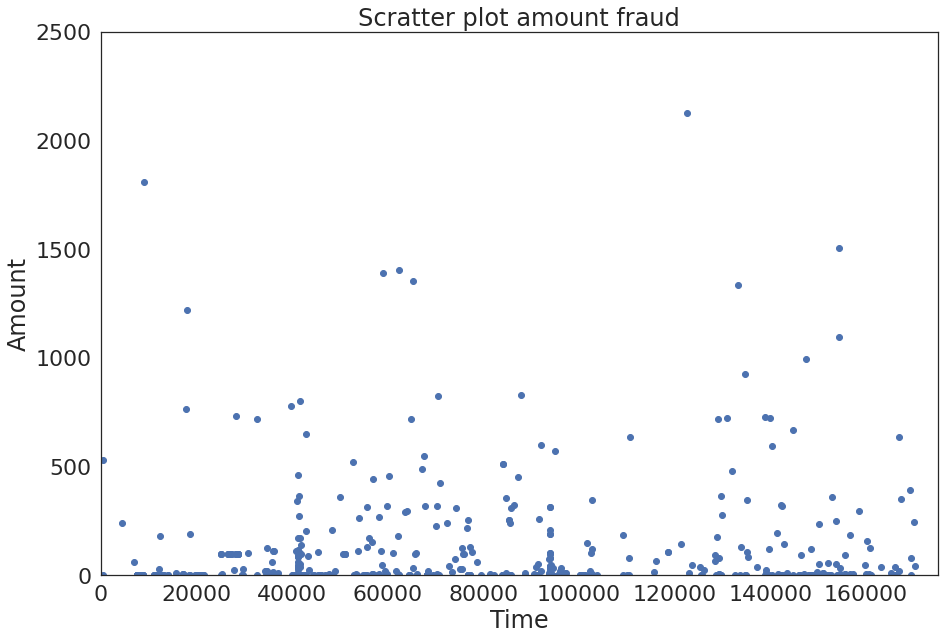

In [16]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [18]:
# Recuperar fraudes superiores a 1000
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] 
print('Existen solo '+ str(nb_big_fraud) + ' fraudes donde el monto fue superior a 1000 sobre  ' + str(df_fraud.shape[0]) + ' fraudes totales')

Existen solo 9 fraudes donde el monto fue superior a 1000 sobre  492 fraudes totales


In [19]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('Existen solo '+ str(number_fraud) + ' fraudes en el fataframe original, mientras que hay ' + str(number_no_fraud) +' no fraudes en el dataframe.')

Existen solo 492 fraudes en el fataframe original, mientras que hay 284315 no fraudes en el dataframe.


In [21]:
print("la precisión del clasificador sería : "+ str((284315-492)/284315)+ "")

la precisión del clasificador sería : 0.998269524998681


# Coeficiente de correlación de pearson

In [24]:
#Calcular la correlación (en defecto pearon) par a par
df_corr = df.corr()

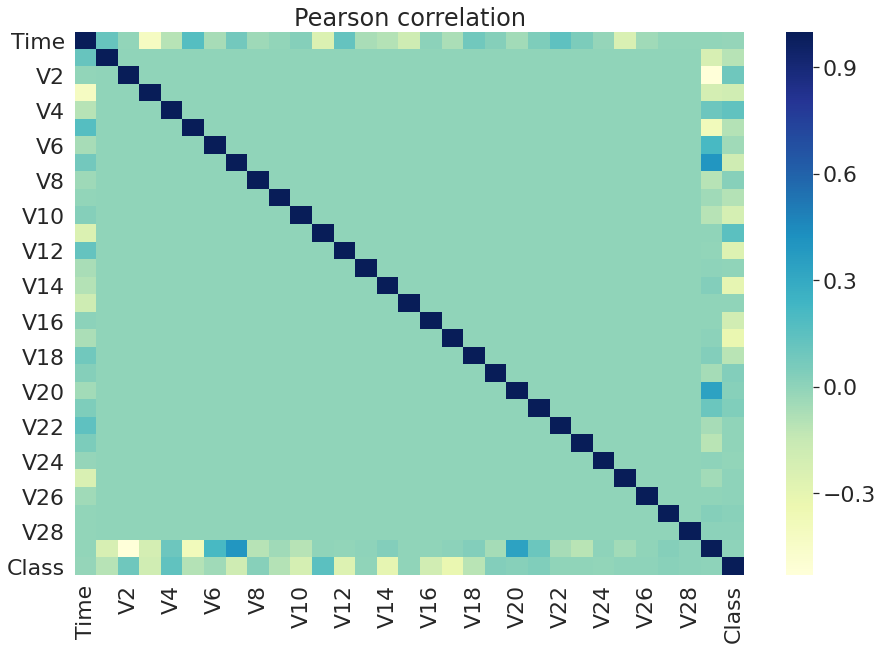

In [25]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") #
seaborn.set(font_scale=2,style='white')

plt.title('Pearson correlation')
plt.show()

In [27]:
#sacar la correlación por tipo de la columna class
rank = df_corr['Class'] 
df_rank = pd.DataFrame(rank) 

df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) 
df_rank.dropna(inplace=True) # Remover datos nulos

# Procesamiento de datos

In [32]:
# Separar los datos para el entrenamiento y test del modelo

# extrar los primeras 150000 registros
df_train_all = df[0:150000]
# separar los datos fraudes y no fraude
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('En este dataframe se tiene ' + str(len(df_train_1)) +" fraudes, por lo que es ideal tomar un numero similar de no fraudes")

df_sample=df_train_0.sample(300)
# Recopilar fraudes y no fraudes 
df_train = df_train_1.append(df_sample)
# mezclar el dataset
df_train = df_train.sample(frac=1) 

En este dataframe se tiene 293 fraudes, por lo que es ideal tomar un numero similar de no fraudes


In [34]:
# eliminamos las columnas time y clase
X_train = df_train.drop(['Time', 'Class'],axis=1) 
# Y_train corresponde a la columna a predecir, en este caso class
y_train = df_train['Class'] 
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [36]:
#testearemos con el data set completo #
df_test_all = df[150000:]

# eliminamos las columnas time y clase
X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
# Y_test corresponde a la columna a predecir, en este caso class
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [37]:

X_train_rank = df_train[df_rank.index[1:11]] 
X_train_rank = np.asarray(X_train_rank)

In [38]:
# with all the test dataset to see if the model learn correctly
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [40]:
# Nombres a predecir, Class = 1 (fraude) y Class = 0 (no fraude)
class_names=np.array(['0','1']) 

In [41]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [44]:
# Usaremos el clasificador SVM con el kerner lineal
classifier = svm.SVC(kernel='linear')

In [45]:
# Entrenamos el modelo con nuestros datos de entrenamiento
classifier.fit(X_train, y_train) 

SVC(kernel='linear')

In [47]:
# Usamos el modelo anterior para predecir todos los datos del dataframe
prediction_SVM_all = classifier.predict(X_test_all)

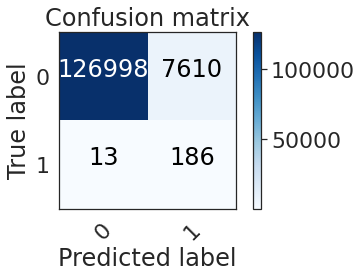

In [48]:
# Matriz de falsos y verdaderon postivos y negativos
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [23]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9370855031796248


In [52]:
print('Detectamos ' + str(cm[1][1]) + ' fraudes / ' + str(cm[1][1]+cm[1][0]) + ' de un total  de fraudes.')
print('La probabilidad de detectar un fraude es de ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("La precisión del modelo es de: "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Detectamos 186 fraudes / 199 de un total  de fraudes.
La probabilidad de detectar un fraude es de 0.9346733668341709
La precisión del modelo es de: 0.9434524913394705


In [53]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [54]:
classifier_b.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

In [55]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) #We predict all the data set.

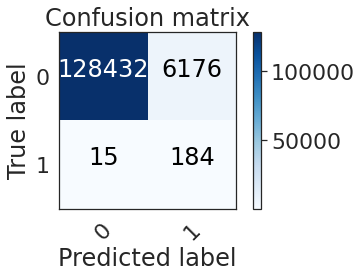

In [56]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

@ Authors:

LE BORGNE Pierre-Alexis :https://www.kaggle.com/pierra

GUILLAUME Florian : https://www.kaggle.com/florianguillaume